In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from abtem.waves import PlaneWave
from abtem.potentials import Potential
from abtem.transfer import CTF
from abtem.plot import show_atoms
from ase.io import read
from abtem.temperature import FrozenPhonons
import matplotlib.pyplot as plt
import numpy as np
#from gpaw import GPAW
#from abtem.dft import GPAWPotential
import cupy as cp
from abtem.waves import transmit, FresnelPropagator
from ase import build
from abtem.structures import orthogonalize_cell
from abtem.waves import Waves

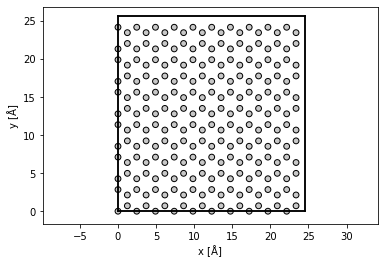

In [32]:
#atoms = read('data/orthogonal_graphene.cif') #* (5,4,1)

atoms = build.graphene()
#atoms[0].symbol = 'B'
#atoms[1].symbol = 'N'

atoms = orthogonalize_cell(atoms) * (10,6,1)
atoms.set_cell(atoms.cell*1, scale_atoms=True)

#atoms.center()
atoms.center(vacuum=3,axis=2)
show_atoms(atoms)

In [26]:
atoms.positions[2]-atoms.positions[1]

array([0.        , 1.42028166, 0.        ])

In [18]:
#atoms = read('data/hexagonal_graphene.cif')
#gpaw = GPAW(h=.1, txt=None, kpts=(3,3,1))
#atoms.calc = gpaw
#atoms.get_potential_energy()

In [44]:
im.shape

(1064, 2048)

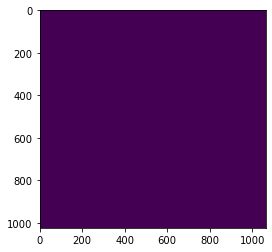

In [69]:
import imageio

im = imageio.imread('diffraction.tif').astype(np.float32)
plt.imshow(np.log(1+100*im))
#array = im[:,:im.shape[1]//2] + 1.j*im[:, :im.shape[1]//2]
#exit_wave = Waves(array, extent=(2.456000*10,4.253917*6), energy=80e3)

#exit_wave.show(figsize=(12,12))
#plt.figure(figsize=(12,12))
#plt.imshow(im.astype(np.float32))

In [33]:
potential = Potential(FrozenPhonons(atoms, 1, {'C':.0}), 
                      sampling=.02,
                      device='gpu', 
                      slice_thickness=2, 
                      parametrization='kirkland', 
                      cutoff_tolerance=1e-4)


wave = PlaneWave(energy=80e3, device='gpu', extent=potential.extent, gpts=potential.gpts).build()

exit_wave = wave.multislice(potential)

#exit_wave = transmit(wave, potential[:])
#propagator = FresnelPropagator()
#exit_wave = propagator.propagate(exit_wave, 10)

[1.         0.2631579  0.05263158 0.05263158 0.05263158 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


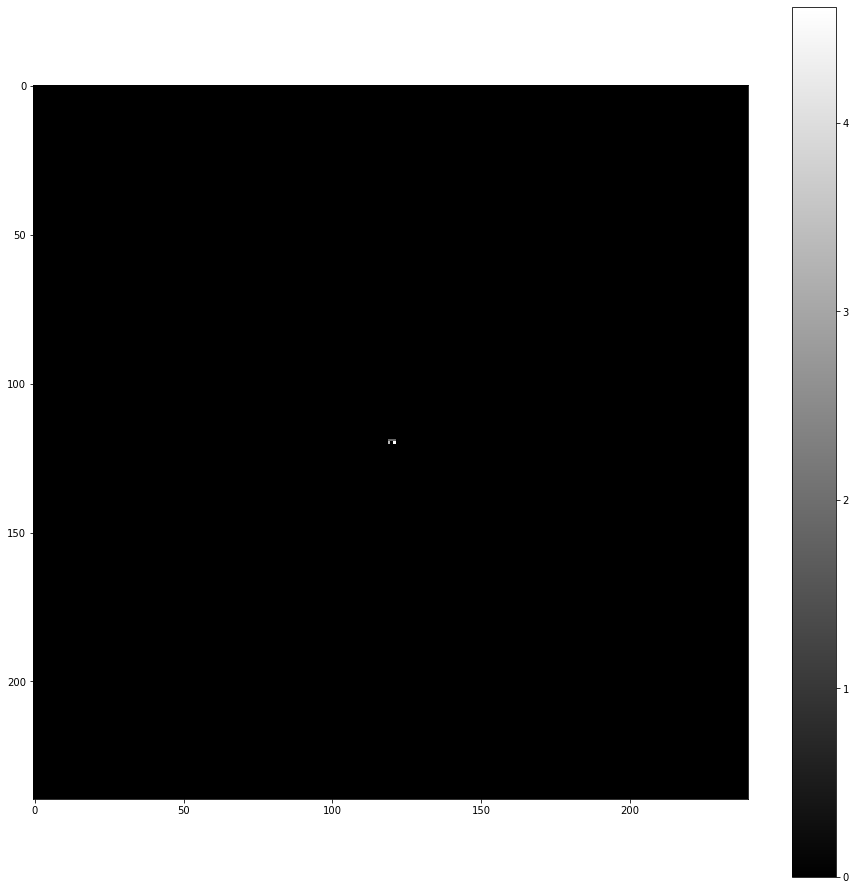

In [66]:
from scipy.ndimage import gaussian_filter
measurement = exit_wave.diffraction_pattern()#[0]

array = im #measurement.array.copy()

array[array.shape[0] // 2, array.shape[1] // 2] = 0

n = 120
start_x = array.shape[0] // 2 - n
end_x = array.shape[0] // 2 + n
start_y = array.shape[1] // 2 - n
end_y = array.shape[1] // 2 + n

values = np.sort(array.ravel())[::-1]
#print(values[3:6])
array /= array.max()

plt.figure(figsize=(16,16))
plt.imshow(np.log(1+100*array[start_x:end_x, start_y:end_y]), cmap='gray')
plt.colorbar()

print(np.sort(array.ravel())[::-1][:50]);